In [1]:
REPO = 'stylegan2-ada-pytorch'
REPO_URL = 'https://github.com/NVlabs/stylegan2-ada-pytorch.git'
def clone_repo():
  import subprocess
  import sys
  if not os.path.exists(REPO):
    subprocess.run(['git', 'clone', REPO_URL])

  sys.path.append(os.path.abspath(REPO))

In [2]:
import os
MODEL_URL = 'https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl'

MODEL_PATH = 'ffhq.pkl'
def download_model():
  if not os.path.exists(MODEL_PATH):
    import urllib.request
    urllib.request.urlretrieve(MODEL_URL, MODEL_PATH)

In [3]:
def generate_images():
  import legacy
  import dnnlib
  import torch
  from torchvision.utils import save_image
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  G = legacy.load_network_pkl(open(MODEL_PATH, 'rb'))['G_ema'].to(device)
  os.makedirs('generated_images', exist_ok=True)
  imgs = []
  for i in range(1): # NUM_IMAGES = 1
    z = torch.randn([1, G.z_dim], device=device)
    label = torch.zeros([1, G.c_dim], device=device)
    img = (G(z, label, truncation_psi=0.5, noise_mode='const') + 1) * 0.5
    save_image(img, f'generated_images/fake_{i}.png')
    imgs.append(img.cpu())
  return torch.cat(imgs)

In [16]:
from torchmetrics.image.inception import InceptionScore
from torch.utils.data import DataLoader, TensorDataset
import torch

def calculate_inception_score(imgs):
  loader = DataLoader(TensorDataset((imgs * 255).clamp(0, 255).to(torch.uint8)),batch_size=32)
  is_metric = InceptionScore()
  for batch in loader:
    is_metric.update(batch[0])
  mean, std = is_metric.compute()
  print(f"Inception Score: {mean:.2f} ± {std:.2f}")

In [15]:
%pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 27.1 MB/s eta 0:00:00


In [17]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch

def prepare_real_images():
  dataset = dsets.CelebA(root='./data', split='train',
    transform=transforms.Compose([
    transforms.Resize(512),
    transforms.CenterCrop(512),
    transforms.ToTensor()
  ]),download=True)
  loader = DataLoader(dataset, batch_size=1, shuffle=True)
  os.makedirs('real_images', exist_ok=True)
  for i, (img, _) in enumerate(loader):
    if i >= 1: break
    save_image(img, f"real_images/real_{i}.png")

In [18]:
import subprocess
import torch

def calculate_fid():
  subprocess.run(["python", "-m", "pytorch_fid", "real_images", "generated_images"])

Setting up PyTorch plugin "bias_act_plugin"... Failed!


/content/stylegan2-ada-pytorch/torch_utils/ops/bias_act.py:50: UserWarning: Failed to build CUDA kernels for bias_act. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/content/stylegan2-ada-pytorch/torch_utils/ops/bias_act.py", line 48, in _init
    _plugin = custom_ops.get_plugin('bias_act_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/stylegan2-ada-pytorch/torch_utils/custom_ops.py", line 110, in get_plugin
    torch.utils.cpp_extension.load(name=module_name, verbose=verbose_build, sources=sources, **build_kwargs)
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/cpp_extension.py", line 1681, in load
    return _jit_compile(
           ^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/cpp_extension.py", line 2138, in _jit_compile
    _write_ninja_file_and_

Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


/content/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/content/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py", line 32, in _init
    _plugin = custom_ops.get_plugin('upfirdn2d_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/stylegan2-ada-pytorch/torch_utils/custom_ops.py", line 110, in get_plugin
    torch.utils.cpp_extension.load(name=module_name, verbose=verbose_build, sources=sources, **build_kwargs)
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/cpp_extension.py", line 1681, in load
    return _jit_compile(
           ^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/cpp_extension.py", line 2138, in _jit_compile
    _write_ninja_file

Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


/content/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/content/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py", line 32, in _init
    _plugin = custom_ops.get_plugin('upfirdn2d_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/stylegan2-ada-pytorch/torch_utils/custom_ops.py", line 110, in get_plugin
    torch.utils.cpp_extension.load(name=module_name, verbose=verbose_build, sources=sources, **build_kwargs)
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/cpp_extension.py", line 1681, in load
    return _jit_compile(
           ^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/cpp_extension.py", line 2164, in _jit_compile
    return _import_mo

Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


/content/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/content/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py", line 32, in _init
    _plugin = custom_ops.get_plugin('upfirdn2d_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/stylegan2-ada-pytorch/torch_utils/custom_ops.py", line 110, in get_plugin
    torch.utils.cpp_extension.load(name=module_name, verbose=verbose_build, sources=sources, **build_kwargs)
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/cpp_extension.py", line 1681, in load
    return _jit_compile(
           ^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/cpp_extension.py", line 2164, in _jit_compile
    return _import_mo

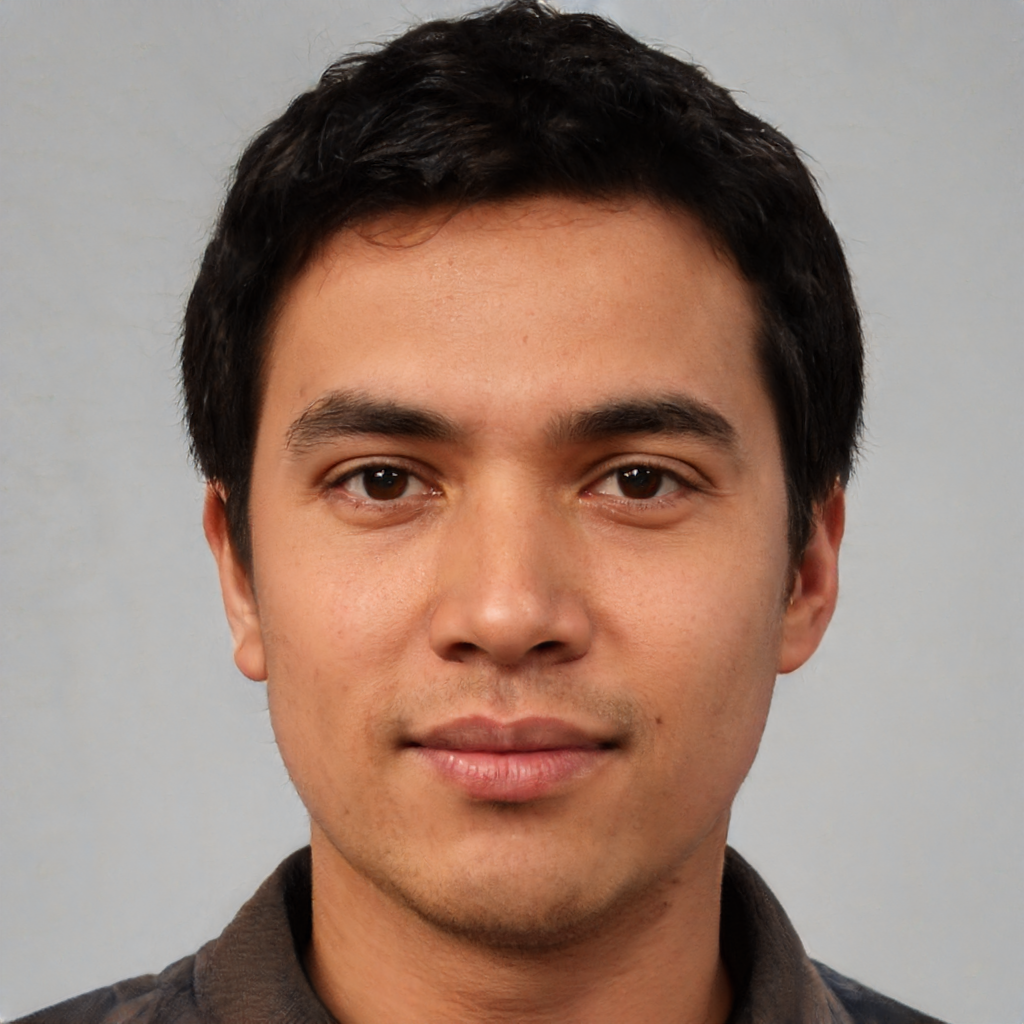

In [20]:
def main():
  clone_repo()
  download_model()
  # Use the existing generate_images function instead of generate_images_with_script
  generate_images()
  # Display the generated image from the 'generated_images' directory
  from IPython.display import Image, display
  display(Image(filename='generated_images/fake_0.png'))


if __name__ == "__main__":
  main()

In [22]:
def generate_images_with_script():
  import os
  import subprocess
  from IPython.display import Image, display
  os.chdir(REPO)
  subprocess.run(["python", "generate.py", "--outdir", "../generated_images_script", "--trunc", "0.5", "--seeds", "0-0", "--network", "../" + MODEL_PATH, "--skip_build_custom_cuda_ops"])
  os.chdir("..")
  # Display the generated image
  display(Image(filename='generated_images_script/seed0000.png'))